In [26]:
from requests import get
from bs4 import BeautifulSoup as bs
from pandas import DataFrame as df
from pandas import read_csv, read_pickle
import numpy as np
from datetime import date, datetime
import re
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.utils import to_categorical
from random import randint
%matplotlib inline

In [4]:
'''This project was created to eventually use ML to develop a story based off of 
the text already given by the website, learnakan. These are not my stories, 
but they are the property of the creator. I am simply interested in analysis, 
and learning how to generate text.'''

'\nThis project was created to eventually use ML to develop a story based off of \nthe text already given by the website, learnakan. These are not my stories, \nbut they are the property of the creator. I am simply interested in analysis, \nand learning how to generate text.\nThe machine learning models do NOT work.'

In [2]:
import nltk
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopwords
Command 'stopwords' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> stopword
Command 'stopword' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
--

        C:\Users\winte_000\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
twi_url = 'https://learnakan.com/twi-short-story-2/'
twi_url2 = 'https://learnakan.com/twi-short-story-part-three-3-with-english-translation/'
#download the web page w req
twi_download = get(twi_url)
twi_down2 = get(twi_url2)
print('Downloaded!')
#bs parting
twi_html = bs(twi_download.text, 'html.parser') #problem w lxml
twi_html2 = bs(twi_down2.text, 'html.parser') #problem w lxml

Downloaded!


In [4]:
# Initialize variables
textTag = 'p'
cols = ['text']
# Extract the tags.
paragraphs = twi_html.find_all(textTag)
para2 = twi_html2.find_all(textTag)
#Loop through each one to extract its text.
article = [paragraph.get_text() for paragraph in paragraphs]
article2 = [paragraph.get_text() for paragraph in para2]
# Load data into dataframe
df1 = df(article, columns=cols)
df2 = df(article2, columns=cols)

In [6]:
df1.head() 
df2.head()
text = ' '.join(article)
para1 = df1['text'].iloc[2]
para2 = df1['text'].iloc[4]
para3 = df1['text'].iloc[6]
para4 = df2['text'].iloc[2]
para5 = df2['text'].iloc[4]
para6 = df2['text'].iloc[6]
para7 = df2['text'].iloc[8]
twi1 = para1 + para2 + para3 
twi2 = para4 + para5 + para6 + para7
print(twi2)
print(twi1)

(In this same community lived a handsome young man whom many used to call ‘Obiarabɛwu’. They explain that this young man had once made much money for himself. Despite his wealth, Obiarabɛwu was very humble, and kind. Whether you’re young or old, Obiarabɛwu showed you respect. If you’re in need too and he has, he’s quick to help you.)(Women like rosy lifestyles. I’m sure you’ve heard this saying before. So, which lady wouldn’t want such a handsome wealthy young man? My friend says, it didn’t take too long before different kinds of women began ‘pushing themselves on’ Obiarabɛwu. Amongst them the tall and short ones, the plump and slim ones, you should’ve seen it for yourself, you shouldn’t be told.)(Obiarabɛwu wasn’t someone who lived a reckless lifestyle. To ensure that he doesn’t fall morally, he chose one lady out of the lot and married her. After the marriage, Obiarabɛwu showed true love to his wife; his wife also made Obiarabɛwu see that she loved him dearly.)Because of the love and

In [34]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence.lower()
twi_para = preprocess_text(twi1)
#not doing well with appostrosphes, need to seperate setences by .
print(twi_para)

but you didn ask me about what marlay did to the many clothes when he was about to retire to bed hmm around in the evening marlay would ve finished his daily rounds roaming and gotten back to where he sleeps by the time he gets back too he ll be like house so big then he ll patiently take off the dresses one after the other and heap them on the floor till none is left on him after this he ll set off in his nakedness to find something to eat before he comes back to sleep when he out scavenging for food that the time when those whose clothes were stolen by marlay in the day and who know no shame run to pick theirs out of the heap as for marlay whether you ll come for yours or not he doesn care at all the only thing he cares about is to wake up the next morning and set off to pick new clothes while all this was going on there was something unique that marlay used to carry about every day at all times when he going out to roam he carrying it when he eating it lies right by him when he slee

In [13]:
from nltk.tokenize import word_tokenize

twi_para = (word_tokenize(sentence2))
n_words = len(twi_para)
unique_words = len(set(twi_para))

print('Total Words: %d' % n_words)
print('Unique Words: %d' % unique_words)

Total Words: 317
Unique Words: 157


In [15]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=3437)
tokenizer.fit_on_texts(twi_para)

In [16]:
vocab_size = len(tokenizer.word_index) + 1
word_2_index = tokenizer.word_index

In [18]:
print(twi_para[51])
print(word_2_index[twi_para[51]])

be
72


In [20]:
input_sequence = []
output_words = []
input_seq_length = 100

for i in range(0, n_words - input_seq_length , 1):
    in_seq = twi_para[i:i + input_seq_length]
    out_seq = twi_para[i + input_seq_length]
    input_sequence.append([word_2_index[word] for word in in_seq])
    output_words.append(word_2_index[out_seq])

In [21]:
print(input_sequence[0])

[32, 5, 56, 33, 17, 34, 11, 15, 6, 57, 2, 3, 18, 19, 7, 1, 12, 11, 2, 58, 2, 59, 60, 35, 20, 3, 61, 6, 62, 63, 64, 16, 36, 65, 66, 8, 67, 21, 2, 68, 1, 69, 22, 3, 37, 1, 70, 21, 71, 1, 9, 72, 73, 38, 74, 23, 39, 75, 1, 9, 76, 77, 24, 3, 78, 79, 40, 3, 80, 8, 41, 81, 25, 3, 82, 83, 84, 26, 85, 25, 42, 40, 43, 1, 9, 44, 24, 20, 16, 86, 2, 87, 27, 2, 88, 89, 1, 90, 21, 2]


In [27]:
X = np.reshape(input_sequence, (len(input_sequence), input_seq_length, 1))
X = X / float(vocab_size)

y = to_categorical(output_words)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (217, 100, 1)
y shape: (217, 158)


In [28]:
model = Sequential()
model.add(LSTM(800, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(800, return_sequences=True))
model.add(LSTM(800))
model.add(Dense(y.shape[1], activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 800)          2566400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 800)          5123200   
_________________________________________________________________
lstm_2 (LSTM)                (None, 800)               5123200   
_________________________________________________________________
dense (Dense)                (None, 158)               126558    
Total params: 12,939,358
Trainable params: 12,939,358
Non-trainable params: 0
_________________________________________________________________


In [29]:
random_seq_index = np.random.randint(0, len(input_sequence)-1)
random_seq = input_sequence[random_seq_index]

index_2_word = dict(map(reversed, word_2_index.items()))

word_sequence = [index_2_word[value] for value in random_seq]

print(' '.join(word_sequence))

lies right by him when he s sleeping it s his pillow and i know for sure that you ll ask what it was you re right to ask it s nothing else than a very big sack full of something that he s tied it so tightly i know many mentally derailed persons carry around different sacks daily but according to the friend who told me the story what was unique about marlay s is the fact that he had carried the same sack for so many years and woe betide you if you come close to his sack


In [30]:
for i in range(100):
    int_sample = np.reshape(random_seq, (1, len(random_seq), 1))
    int_sample = int_sample / float(vocab_size)

    predicted_word_index = model.predict(int_sample, verbose=0)

    predicted_word_id = np.argmax(predicted_word_index)
    seq_in = [index_2_word[index] for index in random_seq]

    word_sequence.append(index_2_word[ predicted_word_id])

    random_seq.append(predicted_word_id)
    random_seq = random_seq[1:len(random_seq)]

In [31]:
final_output = ""
for word in word_sequence:
    final_output = final_output + " " + word

print(final_output)

 lies right by him when he s sleeping it s his pillow and i know for sure that you ll ask what it was you re right to ask it s nothing else than a very big sack full of something that he s tied it so tightly i know many mentally derailed persons carry around different sacks daily but according to the friend who told me the story what was unique about marlay s is the fact that he had carried the same sack for so many years and woe betide you if you come close to his sack nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothing nothi

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
text = new_twi1
labels = new_twi2
#print(new_twi1)

#text2 = new_twi2
cv_final=CountVectorizer(text,max_features=45,ngram_range=(1,1),stop_words='english',min_df=1)
cv_final_labs=CountVectorizer(labels,max_features=45,ngram_range=(1,1),stop_words='english',min_df=1)

#count vect is tokenizer
cv_final_doc=cv_final.fit_transform(text)
cv_lab_doc=cv_final_labs.fit_transform(labels)

print('The shape is:', cv_final_doc.shape)
print(cv_final.vocabulary_) #token values
print("The other shape is:",cv_lab_doc.shape)
print(cv_final_labs.vocabulary_) #token values

The shape is: (18, 45)
{'ask': 1, 'marlay': 12, 'clothes': 4, 'retire': 17, '630': 0, 've': 43, 'daily': 6, 'rounds': 21, 'roaming': 20, 'sleeps': 29, 'time': 38, 'll': 11, 'big': 2, 'patiently': 13, 'heap': 9, 'till': 37, 'set': 26, 'sleep': 27, 'scavenging': 25, 'stolen': 30, 'day': 7, 'know': 10, 'run': 22, 'pick': 15, 'theirs': 33, 'come': 5, 'thing': 34, 'wake': 44, 'going': 8, 'unique': 41, 'used': 42, 'carry': 3, 'times': 39, 'roam': 19, 'right': 18, 'sleeping': 28, 'pillow': 16, 'sure': 32, 'sack': 23, 'tied': 35, 'tightly': 36, 'persons': 14, 'sacks': 24, 'told': 40, 'story': 31}
The other shape is: (17, 45)
{'lived': 5, 'handsome': 3, 'young': 44, 'man': 7, 'used': 35, 'obiarabɛwu': 10, 'money': 8, 'wealth': 40, 'old': 11, 'showed': 28, 'respect': 20, 'need': 9, 'quick': 18, 'women': 43, 'rosy': 21, 'sure': 30, 've': 36, 'saying': 23, 'lady': 4, 'want': 38, 'wealthy': 41, 'says': 24, 'different': 1, 'pushing': 17, 'tall': 31, 'short': 26, 'ones': 12, 'plump': 15, 'slim': 29, 

C:\Users\winte_000\miniconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=['but you didn’t ask me about what marlay did to the many clothes when he was about to retire to bed', 'hmm…around 630 in the evening marlay would’ve finished his daily rounds/roaming and gotten back to where he sleeps', 'by the time he gets back too he’ll be like a house; so big', 'then he’ll patiently take off the dresses one after the other and heap them on the floor till none is left on him', 'after this he’ll set off in his nakedness to find something to eat before he comes back to sleep', 'when he’s out scavenging for food that’s the time when those whose clothes were stolen by marlay in the day and who know no shame run to pick theirs out of the heap', 'as for marlay whether you’ll come for yours or not he doesn’t care at all', 'the only thing he cares about is to wake up the next morning and set off to pick new clothes', 'while all this was going on there was something uniq

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
#term Frequency – Inverse Document”
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
vocabb = vectorizer.vocabulary_
print(vocabb)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
#print(vector.shape)
vec_ar = vector.toarray()
#print(vec_ar)

{'but': 17, 'you': 152, 'didn': 32, 'ask': 8, 'me': 70, 'about': 1, 'what': 141, 'marlay': 69, 'did': 31, 'to': 130, 'the': 117, 'many': 68, 'clothes': 25, 'when': 142, 'he': 53, 'was': 139, 'retire': 93, 'bed': 12, 'hmm': 57, 'around': 6, '630': 0, 'in': 60, 'evening': 39, 'would': 150, 've': 136, 'finished': 43, 'his': 56, 'daily': 28, 'rounds': 97, 'roaming': 96, 'and': 5, 'gotten': 51, 'back': 10, 'where': 143, 'sleeps': 108, 'by': 18, 'time': 128, 'gets': 49, 'too': 132, 'll': 67, 'be': 11, 'like': 66, 'house': 58, 'so': 109, 'big': 16, 'then': 120, 'patiently': 88, 'take': 114, 'off': 81, 'dresses': 35, 'one': 83, 'after': 3, 'other': 86, 'heap': 54, 'them': 119, 'on': 82, 'floor': 44, 'till': 127, 'none': 77, 'is': 61, 'left': 64, 'him': 55, 'this': 123, 'set': 104, 'nakedness': 73, 'find': 42, 'something': 110, 'eat': 36, 'before': 14, 'comes': 27, 'sleep': 106, 'out': 87, 'scavenging': 102, 'for': 46, 'food': 45, 'that': 116, 'those': 124, 'whose': 147, 'were': 140, 'stolen': 

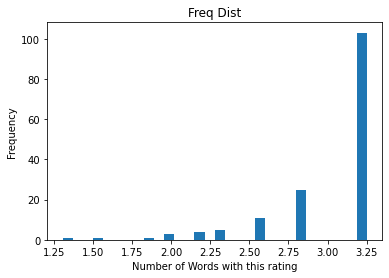

In [16]:
#Data Vis- Histogram of hosts having multiple IDs. Probably would be best shown with a bar graph.
plt.hist(vectorizer.idf_, bins = 30)
plt.title("Freq Dist")
plt.xlabel("Number of Words with this rating")
plt.ylabel("Frequency")
plt.show()